In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree

In [4]:
def find_candidates_for_thresholds(x, y):
    x = x.sort_values().drop_duplicates()
    x_roll_mean = x.rolling(2).mean().dropna()
    y = y[x_roll_mean.index]
    y_roll_mean = y.diff()
    candidates = x_roll_mean[y_roll_mean != 0]
    return candidates.values

## Продалжаем здессь [DecisionTree_CART_3](DecisionTree_CART_3.ipynb)

Для начала создадим функцию для расчёта среднего квадрата ошибки — squared_error(). Она будет принимать на вход истинные ответы и возвращать значение MSE, рассчитанное для входных данных.

In [1]:
def squared_error(y):
    y_pred = y.mean()
    return ((y - y_pred) ** 2).mean()

Далее нам необходимо реализовать функцию split(), которая разбивает выборку $(X, y)$ по предикату $[x_j\le t]$ с параметрами разделения (split_params) на левую и правую части:

In [13]:
def split(X, y, split_params):
    j, t = split_params
    predicat = X.iloc[:, j] <= t # записываем True или False выполнения условия равное количеству X   
    X_left, y_left = X[predicat], y[predicat]
    X_right, y_right = X[~predicat], y[~predicat]
    return X_left, y_left, X_right, y_right

Затем создадим функцию calculate_weighted_impurity(). Она будет принимать на вход выборку — X и y, параметры разбиения — split_params, а также criterion — функцию, по которой рассчитывается критерий информативности (у нас это функция squared_error()). Результатом работы функции будет взвешенная неоднородность после разбиения.

In [3]:
def calculate_weighted_impurity(X, y, split_params, criterion):
    X_left, y_left, X_right, y_right = split(X, y, split_params)
    N, N_left, N_right  = y.size, y_left.size, y_right.size
    score = N_left / N * criterion(y_left) + N_right / N * criterion(y_right)
    return score

Наконец, финальный шаг — построить решающий пень. Для этого необходимо оформить в виде цикла отбор кандидатов в параметры разбиения и найти оптимальные из них. За данный шаг будет отвечать функция best_split(). Она будет принимать на вход выборку (X и y) и возвращать оптимальные параметры разбиения, при которых значение взвешенной неоднородности минимально, а также значение этой неоднородности.

In [5]:
def best_split(X, y, criterion):
    M = X.shape[1]
    min_weighted_impurity = np.inf
    optimal_split_params = None
    for j in range(M):
        thresholds = find_candidates_for_thresholds(X.iloc[:, j], y)
        for t in thresholds:
            split_params = (j, t)
            weighted_impurity = calculate_weighted_impurity(X, y, split_params, criterion)
            if weighted_impurity < min_weighted_impurity:
                min_weighted_impurity = weighted_impurity
                optimal_split_params = split_params
    return optimal_split_params

Давайте протестируем функцию best_split() — возьмём датасет из нашего последнего примера:

In [8]:
data = pd.DataFrame({
    'x1': list(range(1, 16)),
    'y': [1, 1.2, 1.4, 1.1, 1, 5.5, 6.1, 6.7, 6.4, 6, 6, 3, 3.2, 3.1, 3]
})
X = data[['x1']]
y = data['y']

Чтобы найти параметры решающего пня, нам осталось только вызвать функцию best_split(), передав в неё выборку и функцию для расчёта критерия информативности:

In [14]:
# Находим оптимальные параметры разбиения
optimal_split_params = best_split(X, y, criterion=squared_error)
print('Optimal j: {}'.format(optimal_split_params[0]))
print('Optimal t: {}'.format(optimal_split_params[1]))

# Optimal j: 0
# Optimal t: 5.5

Optimal j: 0
Optimal t: 5.5


# Автоматически

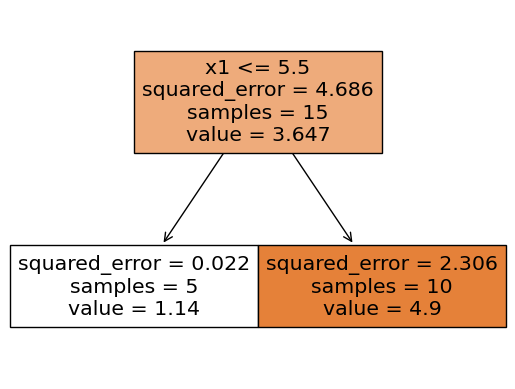

In [15]:
# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем её
dt = tree.DecisionTreeRegressor(
    max_depth=1, #глубина
    criterion='squared_error', #критерий информативности
    random_state=0 #генератор случайных чисел
)

dt.fit(X, y)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=list(X.columns), #названия факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

### Задание 4.3

Дана часть датасета о домах в штате Айова, состоящая из 15 наблюдений:
```python
ames_data = ames_data[(ames_data["Lot Frontage"] <=150) & (ames_data["Lot Area"] <=20000)]

ames_sample = ames_data[["Lot Frontage", "Lot Area", "SalePrice"]].sample(
    n=15, random_state=42, ignore_index=True
)

X = ames_sample[["Lot Frontage", "Lot Area"]]
y = ames_sample["SalePrice"]
```
Найдите оптимальные для построения решающего пня параметры разбиения $j$ и $t$. В качестве критерия информативности используйте квадратичную ошибку.

Если вы хотите попрактиковаться в использовании формул, можно проделать операцию построения дерева решений вручную.

Примечание. Для самопроверки обучите на данной части датасета дерево решений из sklearn с максимальной глубиной 1, критерием информативности 'squared_error' и параметром random_state = 0 и визуализируйте его граф.

1. На основе какого фактора $x_j$ будет построено решающее правило в корневой вершине?

In [18]:
ames_data = pd.read_csv('../../data/AmesHousing.csv')
ames_data = ames_data[(ames_data["Lot Frontage"] <=150) & (ames_data["Lot Area"] <=20000)]

ames_sample = ames_data[["Lot Frontage", "Lot Area", "SalePrice"]].sample(
    n=15, random_state=42, ignore_index=True
)

X = ames_sample[["Lot Frontage", "Lot Area"]]
y = ames_sample["SalePrice"]

# Находим оптимальные параметры разбиения
optimal_split_params = best_split(X, y, criterion=squared_error)
print('На основе какого фактора x_j = {} будет построено решающее правило в корневой вершине'.format(optimal_split_params[0]))
print('оптимальное пороговое значение t = {:.0f}'.format(optimal_split_params[1]))
temp=calculate_weighted_impurity(X, y, split_params=optimal_split_params, criterion=squared_error)
print('значение взвешенной неоднородности после разбиения при найденных оптимальных параметрах сплита = {:.0f}'.format(temp))

На основе какого фактора x_j = 0 будет построено решающее правило в корневой вершине
оптимальное пороговое значение t = 71
значение взвешенной неоднородности после разбиения при найденных оптимальных параметрах сплита = 1414654917


## Категории

Реализуем функцию entropy(), которая рассчитывает энтропию Шеннона. На вход функции приходит целевая переменная . Далее с помощью функции value_counts() считаются доли каждого из классов — вероятности принадлежности к классам. Затем эти вероятности логарифмируются по основанию , и наконец по приведённой выше формуле рассчитывается энтропия.

In [19]:
def entropy(y):
    p = y.value_counts(normalize=True)
    entropy = -np.sum(p * np.log2(p))
    return entropy

Для вызова самой функции best_split() нужно будет только поменять критерий информативности (параметр criterion). Пример:

In [21]:
optimal_params = best_split(X, y, criterion=entropy)
# Находим оптимальные параметры разбиения

print('Optimal j: {}'.format(optimal_split_params[0]))
print('Optimal t: {}'.format(optimal_split_params[1]))

Optimal j: 0
Optimal t: 71.0


### Задание 4.5
Дана часть датасета о банкнотах, состоящая из 15 наблюдений:
```python
bill_data = pd.read_csv('data/bill_authentication.csv')
bill_sample = bill_data[['Variance', 'Skewness', 'Class']].sample(
    n=15, 
    random_state=42, 
    ignore_index=True
)
# Создаём обучающую выборку
X = bill_sample[['Variance', 'Skewness']]
y = bill_sample['Class']
```
Найдите оптимальные для построения решающего пня параметры разбиения $j$ и $t$. Для этого воспользуйтесь функцией best_split(), которую мы реализовали ранее. В качестве критерия информативности используется энтропию Шеннона.

Если вы хотите попрактиковаться в использовании формул, можно проделать операцию построения дерева решений вручную.

Примечание. Для самопроверки обучите на данной части датасета дерево решений из sklearn с максимальной глубиной 1, критерием информативности 'entropy' и параметром random_state = 0 и визуализируйте его граф.

In [29]:
bill_data = pd.read_csv('../../data/bill_authentication.csv')
bill_sample = bill_data[['Variance', 'Skewness', 'Class']].sample(
    n=15, 
    random_state=42, 
    ignore_index=True
)
# Создаём обучающую выборку
X = bill_sample[['Variance', 'Skewness']]
y = bill_sample['Class']

optimal_params = best_split(X, y, criterion=entropy)
# Находим оптимальные параметры разбиения

print('На основе какого фактора x_j = {} будет построено решающее правило в корневой вершине'.format(optimal_params[0]))
print('оптимальное пороговое значение t = {:.3f}'.format(optimal_params[1]))
temp=calculate_weighted_impurity(X, y, split_params=optimal_params, criterion=entropy)
print('значение взвешенной неоднородности после разбиения при найденных оптимальных параметрах сплита = {:.2f}'.format(temp))

На основе какого фактора x_j = 1 будет построено решающее правило в корневой вершине
оптимальное пороговое значение t = 3.221
значение взвешенной неоднородности после разбиения при найденных оптимальных параметрах сплита = 0.46


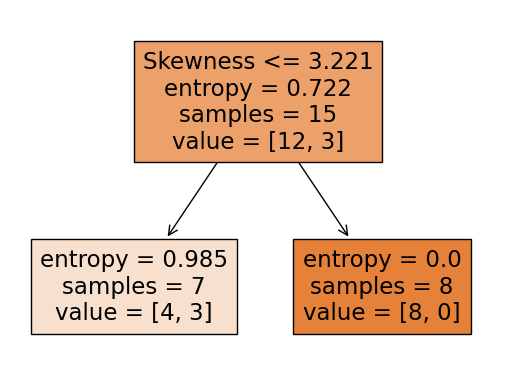

In [28]:
# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем её
dt = tree.DecisionTreeClassifier(
    max_depth=1, #глубина
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)

dt.fit(X, y)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=list(X.columns), #названия факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);